In [1]:
import time
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from cv2 import resize, INTER_CUBIC
from matplotlib.patches import Circle

from ex1_student_solution import Solution

import numpy as np

In [2]:
s = Solution()

In [3]:

src_image = mpimg.imread('src.jpg')
dst_image = mpimg.imread('dst.jpg')
dst_img,src_img = dst_image,src_image
matches = scipy.io.loadmat('matches.mat')

# src_image = mpimg.imread('src_test.jpg')
# dst_image = mpimg.imread('dst_test.jpg')
# dst_img,src_img = dst_image,src_image

# matches = scipy.io.loadmat('matches_test.mat')


In [4]:
match_p_src = matches['match_p_src']
match_p_dst = matches['match_p_dst']

In [5]:

# Parameters
max_err = 25
inliers_percent = 0.8


In [6]:
# pano=s.panorama(src_img,dst_img,match_p_src,match_p_dst,inliers_percent,max_err)

In [7]:
# plt.imshow(pano.astype('int'))

In [8]:
###################

In [9]:
h = s.compute_homography(match_p_src,match_p_dst,inliers_percent,max_err)

In [10]:
homography=h

In [11]:
back_h = np.linalg.inv(h)

In [ ]:
from collections import namedtuple

PadStruct = namedtuple('PadStruct',

                       ['pad_up', 'pad_down', 'pad_right', 'pad_left'])




src_rows_num, src_cols_num, _ = src_image.shape
dst_rows_num, dst_cols_num, _ = dst_image.shape
src_edges = {}
src_edges['upper left corner'] = np.array([1, 1, 1])
src_edges['upper right corner'] = np.array([src_cols_num, 1, 1])
src_edges['lower left corner'] = np.array([1, src_rows_num, 1])
src_edges['lower right corner'] = \
    np.array([src_cols_num, src_rows_num, 1])
transformed_edges = {}
for corner_name, corner_location in src_edges.items():
    transformed_edges[corner_name] = homography @ corner_location
    transformed_edges[corner_name] /= transformed_edges[corner_name][-1]
pad_up = pad_down = pad_right = pad_left = 0
for corner_name, corner_location in transformed_edges.items():
    if corner_location[1] < 1:
        # pad up
        pad_up = max([pad_up, abs(corner_location[1])])
    if corner_location[0] > dst_cols_num:
        # pad right
        pad_right = max([pad_right,
                         corner_location[0] - dst_cols_num])
    if corner_location[0] < 1:
        # pad left
        pad_left = max([pad_left, abs(corner_location[0])])
    if corner_location[1] > dst_rows_num:
        # pad down
        pad_down = max([pad_down,
                        corner_location[1] - dst_rows_num])
panorama_cols_num = int(dst_cols_num) + int(pad_right) + int(pad_left)
panorama_rows_num = int(dst_rows_num) + int(pad_up) + int(pad_down)
pad_struct = PadStruct(pad_up=int(pad_up),
                       pad_down=int(pad_down),
                       pad_left=int(pad_left),
                       pad_right=int(pad_right))

In [ ]:
dst_cols_num

In [ ]:
dst_img.shape

In [ ]:
int(dst_rows_num + pad_up + pad_down)

In [ ]:
dst_rows_num + pad_up + pad_down

In [ ]:
panorama_rows_num 

In [ ]:
int(pad_up)

In [ ]:
int(pad_down)

In [ ]:
transformed_edges

In [ ]:
# from collections import namedtuple

# PadStruct = namedtuple('PadStruct',
#                        ['pad_up', 'pad_down', 'pad_right', 'pad_left'])


In [ ]:
# pad_struct = PadStruct(pad_up=int(np.ceil(pad_up)),
#                        pad_down=int(np.ceil(pad_down)),
#                        pad_left=int(np.ceil(pad_left)),
#                        pad_right=int(np.ceil(pad_right)))

In [12]:
r,c,padding = s.find_panorama_shape(src_image,dst_image,h)

In [13]:
padding

PadStruct(pad_up=14, pad_down=203, pad_right=0, pad_left=1274)

In [14]:
r,c

(1305, 2726)

In [15]:
translated_back_h = s.add_translation_to_backward_homography(back_h,pad_left=padding.pad_left,pad_up=padding.pad_up)

In [16]:
empty_pano = s.compute_backward_mapping(translated_back_h,src_img,(r,c,3))

In [17]:
empty_pano.shape

(1305, 2726, 3)

In [ ]:
missmatch_y = 0#dst_img.shape[0] - (empty_pano.shape[0]-padding.pad_down - padding.pad_up)

In [ ]:
missmatch_x = 0#dst_img.shape[1] - (empty_pano.shape[1]-padding.pad_right - padding.pad_left)

In [ ]:
missmatch_y

In [18]:
empty_pano[padding.pad_up:empty_pano.shape[0]-padding.pad_down,padding.pad_left:empty_pano.shape[1]-padding.pad_right]= dst_img

In [19]:
empty_pano.shape[0]-padding.pad_down-padding.pad_up

1088

In [ ]:
padding.pad_down

In [ ]:
padding.pad_up

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


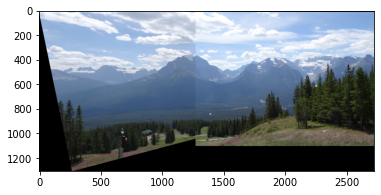

In [20]:
plt.imshow(empty_pano.astype('int'))

In [ ]:
dst_img.shape

In [ ]:
padding.pad_up-empty_pano.shape[0]-padding.pad_down

In [ ]:
(empty_pano.shape[0]-padding.pad_down) - padding.pad_up

In [ ]:
padding.pad_up

In [ ]:
padding.pad_up

In [ ]:
empty_pano.shape[0]-padding.pad_down

In [ ]:
dst_img.shape

In [ ]:
padding.pad_up

In [ ]:
empty_pano.shape[0]-padding.pad_down

In [ ]:
plt.figure(figsize = (30,30))
plt.imshow(empty_pano.astype('int'))

In [ ]:
import cv2
import numpy as np
import scipy.io

In [ ]:
global source, dest, match_p_dst, match_p_src, frame, frame2


In [ ]:

source = cv2.imread('src_test.jpg')
dest = cv2.imread('dst_test.jpg')

In [ ]:

cv2.namedWindow("frame", cv2.WINDOW_NORMAL)

